In [48]:
import numpy as np
import scipy
import sys
import math
import scipy.special
import scipy.constants as const
from math import factorial
from scipy.special import hermite
import matplotlib.pyplot as plt
import random

from libraryMetropolis import delta_choice
from libraryMetropolis import Metropolis
from libraryMetropolis import kinetic_energy_integrand
from libraryMetropolis import numerical_integrand
from libraryMetropolis import total_wf
from libraryMetropolis import kinetic_energy_integrand_2


In [49]:
sigma=1
N=5
N_up=2
R = np.zeros((N,2))
acc, counter=0,0
for i in range(len(R)):
    for j in range(len(R[0])):
        R[i][j]=random.uniform(0,1)   #r[x o y][particella]
        
delta=1
b_par = 1
b_orth = 1
omega=1
jj= False                    # use or not Jastrow
moves=10000
Neq=int(moves*1/50)
N_delta=1000
acc_list = []
kinetic_energy1=[]
kinetic_energy2=[]
potential = []
E_tot=[]
E_tot2=[]
energy=0
h=0.0001

In [50]:
def f(r): 
    return total_wf(N, N_up, r, sigma, b_par, b_orth, use_chi=True, return_A=False)[0]

In [51]:
def potential_energy(omega,R):
    pot=0
    for i in range(N):
        r = R[i][0]**2 + R[i][1]**2
        pot+=(1/2)*omega*r


    return pot

In [52]:
delta = delta_choice(N, N_up, R, sigma, b_par, b_orth, delta, counter, acc,N_delta,jj)

for i in range(moves):
    R,acc, counter = Metropolis(N, N_up, R, sigma, b_par, b_orth, delta, counter, acc ,jj)
    #Kin = kinetic_energy_integrand(N,N_up,R,sigma,b_par,b_orth,omega,use_chi=True)
    Kin2 = kinetic_energy_integrand_2(N,N_up,R,sigma,b_par,b_orth,omega,use_chi=True)
    pot_en = potential_energy(omega,R)
    
    
    if i>=Neq:
        #kinetic_energy1.append(Kin)
        potential.append(pot_en)
        kinetic_energy2.append(Kin2)
        #E_tot.append((1/(i-Neq+1))*Kin)
        E_tot2.append((1/(i-Neq+1))*(Kin2+pot_en))

    acc_list.append(acc/counter)


print(f'sigma={sigma},\u0394={round(delta,3)}')


sigma=1,Δ=1


Text(0.5, 1.0, 'Acceptance rate')

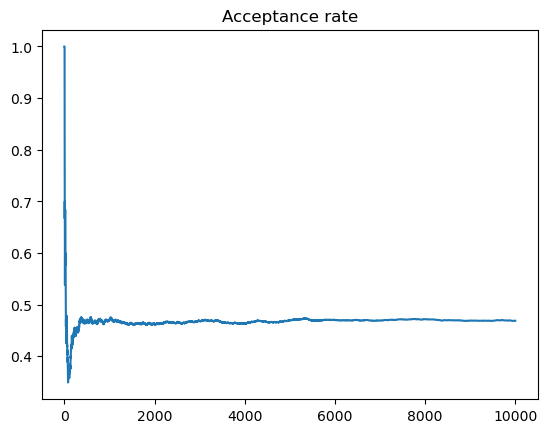

In [53]:
plt.plot(np.array(range(moves)),acc_list)
plt.title('Acceptance rate')

Text(0.5, 1.0, 'Total energy')

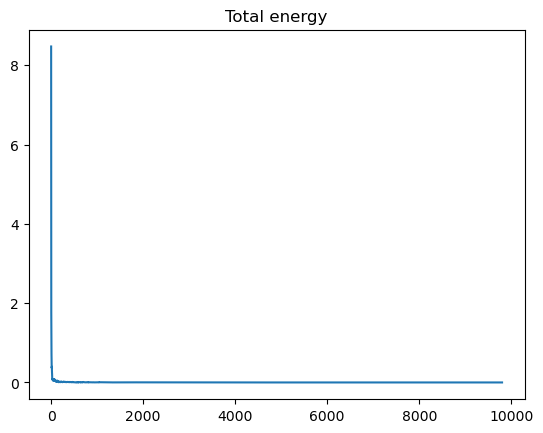

In [54]:
plt.plot(np.array(range(moves-Neq)),E_tot2)
#plt.plot(np.array(range(moves-Neq)),E_tot,'--')
plt.title('Total energy')

In [55]:
print(E_tot2[moves-Neq-1])

0.0007113223280519735
